##### the goal is here to see what changes between baseline and baseline-2snaps, in an attempt to understand why i-band depth stddev is better in the latter as compared to the former.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

In [2]:
import time
import copy
import numpy as np
import healpy as hp
import os
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

import lsst.sims.maf.maps as maps

In [3]:
%matplotlib inline

In [4]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [5]:
nside = 256
area_ppixel = hp.nside2pixarea(nside=nside, degrees=True)

dbdir = '/global/cscratch1/sd/awan/dbs_post_wp_v3'

dbnames = ['%s' % f.split('.db')[0] for f in os.listdir(dbdir) if f.__contains__('baseline') ]
print(dbnames)
dbnames.reverse()

['baseline_2snapsv1.4_10yrs', 'baseline_v1.4_10yrs']


In [6]:
outdir = 'tests'

##### run the metrics to get statistics on the seeing

In [7]:
bundles_all = {}

In [8]:
colname = 'seeingFwhmEff'

 # consider only non-DD visits
sqlconstraint = ' note not like "DD%"'
sqlconstraint += ' and filter=="i"'

resultsDb = db.ResultsDb(outDir=outdir)

for dbname in dbnames:
    bundles = {}
    
    dbpath = '%s/%s.db' % (dbdir, dbname)

    opsdb = db.OpsimDatabase(dbpath)
    # set up slicer
    slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec',
                                   latLonDeg=opsdb.raDecInDeg, nside=nside, useCache=False)
    
    # set up the mean metric
    metric = metrics.MeanMetric(col=colname)
    # setup the bundle
    bundles['mean'] = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
     # set up the mean metric
    metric = metrics.MedianMetric(col=colname)
    # setup the bundle
    bundles['median'] = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    
    # set up the mean metric
    metric = metrics.RmsMetric(col=colname)
    # setup the bundle
    bundles['rms'] = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # set up the group.
    grp = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outdir,
                                          resultsDb=resultsDb, saveEarly=False)
    grp.runAll()

    for key in bundles:
        bundles_all['%s - %s' % (dbname.split('.db')[0], key)] = copy.deepcopy(bundles[key])

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['fieldRA', 'fieldDec', 'seeingFwhmEff']
Found 437227 visits
Running:  ['mean', 'median', 'rms']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['fieldRA', 'fieldDec', 'seeingFwhmEff']
Found 403918 visits
Running:  ['mean', 'median', 'rms']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [9]:
stats = ['mean', 'median', 'rms']

#### look at things in the eg-footprint

In [10]:
eg_dir = '/global/cscratch1/sd/awan/lsst_output/post_wp_output_v1.4_-0.1cuts/lss_fom/eg-footprint-mask/'
yr_cut = '10'

eg_masks = {}
for dbname in dbnames:
    print(dbname)
    file = [f for f in os.listdir(eg_dir) if f.__contains__('eg-footprint_%s' % dbname) and \
                                                f.__contains__('_yr%s_' % yr_cut)
           ]
    print(file)
    
    eg_masks[dbname] = np.genfromtxt('%s/%s' % (eg_dir, file[0])).astype(bool)

baseline_v1.4_10yrs
['eg-footprint_baseline_v1.4_10yrs_yr10_i>25.9_NoDither_nside256.txt']
baseline_2snapsv1.4_10yrs
['eg-footprint_baseline_2snapsv1.4_10yrs_yr10_i>25.9_NoDither_nside256.txt']


##### plot stuff out

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2020_05/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


<Figure size 720x432 with 0 Axes>

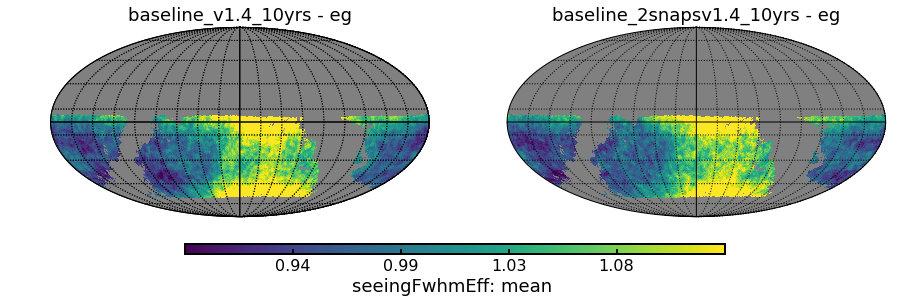

Exception during reset or similar
Traceback (most recent call last):
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2020_05/stack/miniconda3-4.7.10-4d7b902/Linux64/sqlalchemy/1.3.8/lib/python/SQLAlchemy-1.3.8-py3.7-linux-x86_64.egg/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2020_05/stack/miniconda3-4.7.10-4d7b902/Linux64/sqlalchemy/1.3.8/lib/python/SQLAlchemy-1.3.8-py3.7-linux-x86_64.egg/sqlalchemy/pool/base.py", line 867, in _reset
    pool._dialect.do_rollback(self)
  File "/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2020_05/stack/miniconda3-4.7.10-4d7b902/Linux64/sqlalchemy/1.3.8/lib/python/SQLAlchemy-1.3.8-py3.7-linux-x86_64.egg/sqlalchemy/engine/default.py", line 502, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 46912496674624 and this is thread id 4

<Figure size 720x432 with 0 Axes>

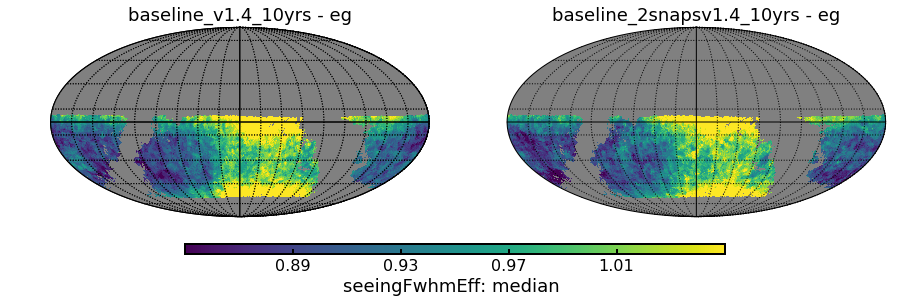

<Figure size 720x432 with 0 Axes>

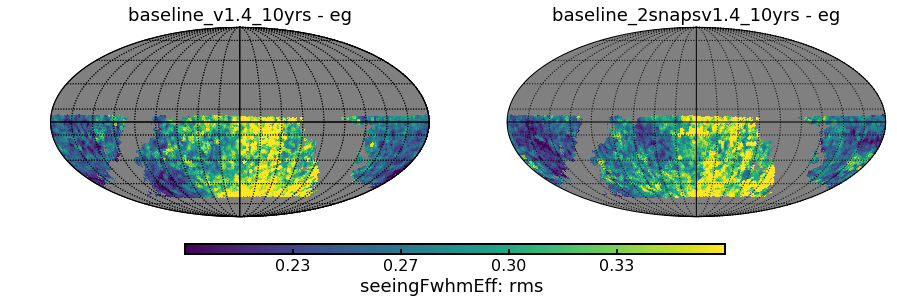

In [11]:
for stat in stats:
    
    plt.clf()
    fig, axes= plt.subplots(1,2)
    for i, dbname in enumerate( dbnames ):

        key = '%s - %s' % (dbname, stat)
        
        temp = copy.deepcopy( bundles_all[key] )
        temp.metricValues.mask[:] = eg_masks[dbname] #.astype(bool)
        
        if i == 0:
            in_survey_pixels = np.where( temp.metricValues.mask == False )[0]
            # find the color range
            median = np.median(temp.metricValues.data[in_survey_pixels])
            stddev = np.std(temp.metricValues.data[in_survey_pixels])

            colormin = median - 1.5 * stddev
            colormax = median + 1.5 * stddev
            nticks = 5

        plt.axes(axes[i])
        hp.mollview(temp.metricValues, flip='astro', rot=(0,0,0),
                    min=colormin, max=colormax, hold=True,
                    cbar=False, title='%s - eg' % dbname)
        hp.graticule(dpar=20, dmer=20, verbose=False)

    # set up the color bar
    increment = (colormax - colormin) / float(nticks)
    ticks = np.arange(colormin + increment, colormax, increment)

    ax = plt.gca()
    im = ax.get_images()[0]
    fig= plt.gcf()
    cbaxes = fig.add_axes([0.25, 0.38, 0.5, 0.01]) # [left, bottom, width, height]
    cb = plt.colorbar(im, orientation='horizontal',
                      ticks=ticks, format='%.2f', cax=cbaxes
                     )
    cb.set_label('%s: %s ' % (colname, stat) )
    fig.set_size_inches(15,15)
    plt.show()

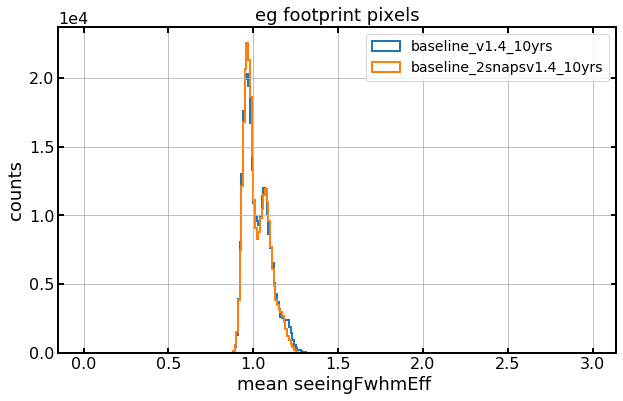

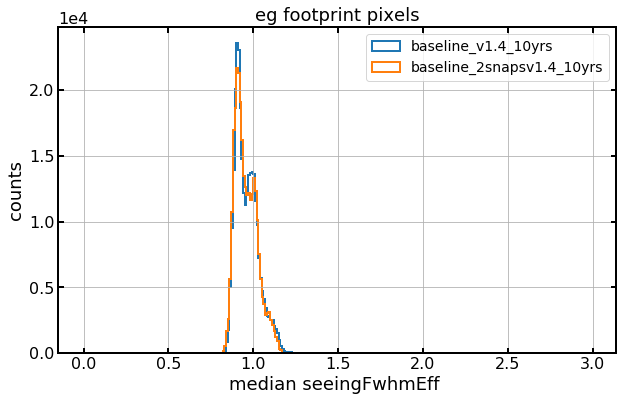

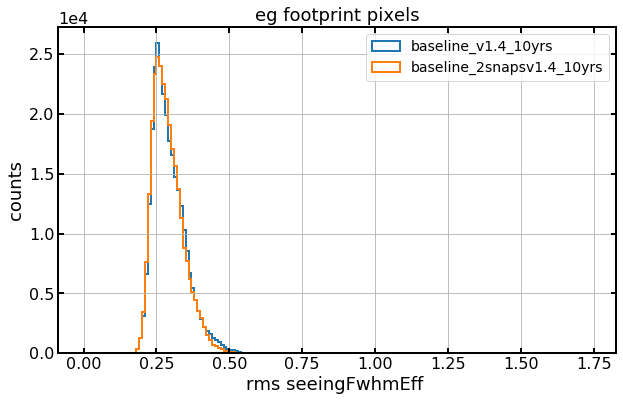

In [12]:
for stat in stats:
    if stat == 'mean' or stat == 'median':
        bins = np.arange(0, 3, 0.01)
    if stat == 'rms':
        bins = np.arange(0, 1.75, 0.01)

    plt.clf()
    for i, dbname in enumerate( dbnames ):

        key = '%s - %s' % (dbname, stat)
        in_survey_pixels = np.where( eg_masks[dbname] == False )[0]
        
        plt.hist(bundles_all[key].metricValues.data[in_survey_pixels], label=dbname, histtype='step', lw=2, bins=bins)

    plt.legend()
    plt.xlabel('%s %s ' % (stat, colname))
    plt.ylabel('counts')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.title('eg footprint pixels')
    plt.show()

okay there appear to be differences in seeing between the two versions. the mean seeing and the rms is slightly better in 2snaps vs. not, but this is not enough to account for 7.7% improvement in depth stddev that we see with baseline-2snaps

#### lets plot out the coadded depth distributions for the eg-footprint

In [13]:
depth_dir = '/global/cscratch1/sd/awan/lsst_output/post_wp_output_v1.4_-0.1cuts/bundle_data/'
ilim = 25.9

depth_bundles = {}

for dbname in dbnames:
    file = [f for f in os.listdir(depth_dir) if f.__contains__('depth_in_eg_%s' % dbname) and \
                f.__contains__('limi%s' % ilim)
               ]
    print(file)
    
    depth_bundles[dbname] = metricBundles.createEmptyMetricBundle()
    depth_bundles[dbname].read('%s/%s' % (depth_dir, file[0]))

['depth_in_eg_baseline_v1.4_10yrs_i-band_limi25.9_nodither_nside256.npz']
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
['depth_in_eg_baseline_2snapsv1.4_10yrs_i-band_limi25.9_nodither_nside256.npz']
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [14]:
area_ppixel = hp.nside2pixarea(nside=256, degrees=True)

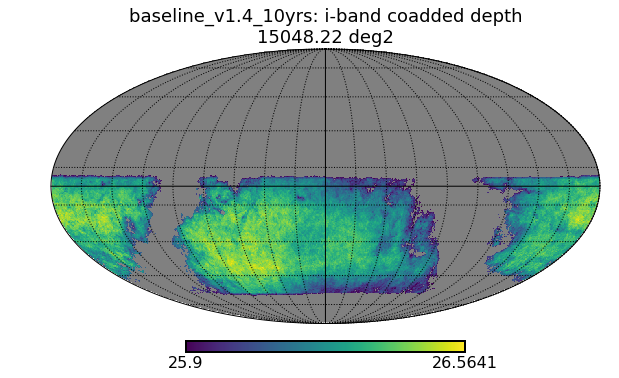

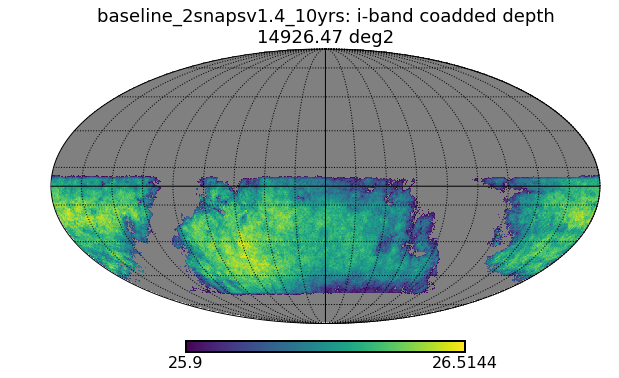

In [15]:
for dbname in depth_bundles:
    in_survey_pixels = np.where( depth_bundles[dbname].metricValues.mask == False )[0]
    hp.mollview(depth_bundles[dbname].metricValues, flip='astro', rot=(0,0,0),
                min=None, max=None, hold=True,
                cbar=True, title='%s: i-band coadded depth\n%.2f deg2' % (dbname , len(in_survey_pixels) * area_ppixel))
    hp.graticule(dpar=20, dmer=20, verbose=False)
    plt.show()

In [16]:
min_all, max_all = 1000, -1000
for dbname in depth_bundles:
    in_survey_pixels = np.where( depth_bundles[dbname].metricValues.mask == False )[0]
    min_all = min( [ min_all, min(depth_bundles[dbname].metricValues.data[in_survey_pixels]) ])
    
    max_all = max( [ max_all, max(depth_bundles[dbname].metricValues.data[in_survey_pixels]) ])
    
print(min_all, max_all)

25.90000669634359 26.566152282770027


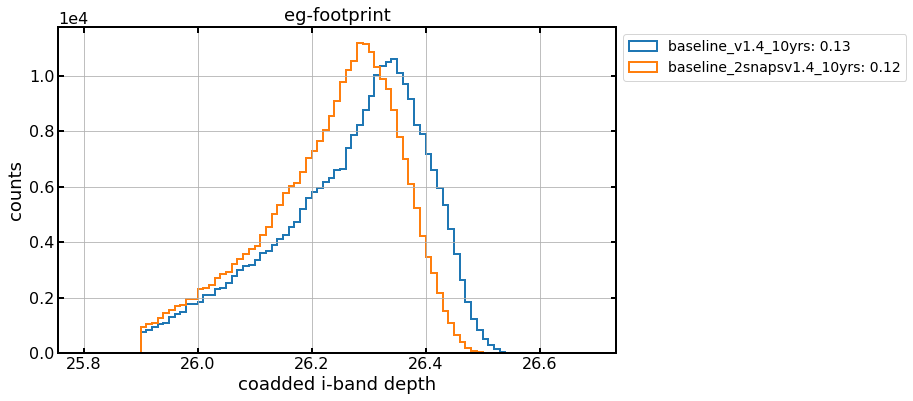

In [17]:
bins = np.arange(25.8, 26.7, 0.01)

plt.clf()

for dbname in depth_bundles:
    in_survey_pixels = eg_masks[dbname] == False
    
    stddev = np.std(depth_bundles[dbname].metricValues.data[in_survey_pixels])
    plt.hist( list(depth_bundles[dbname].metricValues.data[in_survey_pixels]), label='%s: %.2f' % (dbname, stddev), histtype='step', lw=2, bins=bins)

plt.xlabel('coadded i-band depth')
plt.ylabel('counts')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('eg-footprint') 

plt.legend(bbox_to_anchor=(1,1))
plt.show()

okay the depth distribution is narrower in 2snaps => stddev is smaller.

lets check the eg-footprint to be sure

In [18]:
for dbname in depth_bundles:
    print(  '%s: masks match: %s' % (dbname, (eg_masks[dbname].astype(bool) == depth_bundles[dbname].metricValues.mask).all() ))

baseline_v1.4_10yrs: masks match: True
baseline_2snapsv1.4_10yrs: masks match: True


#### lets look at the single-visit depth  in eg-footprint

In [19]:
five_sigma_path = '/global/cscratch1/sd/awan/lsst_output/post-wp_v1.4_five-sigma-depth/'

five_sigma_depth_bundles = {}

for dbname in dbnames:
    file = [f for f in os.listdir(five_sigma_path) if f.__contains__(dbname) and \
               f.__contains__('y10')
               ]
    print(file)
    
    five_sigma_depth_bundles[dbname] = metricBundles.createEmptyMetricBundle()
    five_sigma_depth_bundles[dbname].read('%s/%s' % (five_sigma_path, file[0]))

['baseline_v1.4_10yrs_mean-fiveSigmaDepth_y10_iband_nside256.npz']
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
['baseline_2snapsv1.4_10yrs_mean-fiveSigmaDepth_y10_iband_nside256.npz']
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [20]:
min_all, max_all = 1000, -1000
for dbname in depth_bundles:

    eg_pixels = eg_masks[dbname] == False #np.where( depth_bundles[dbname].metricValues.mask == False )[0]
    
    min_all = min( [ min_all, min(five_sigma_depth_bundles[dbname].metricValues.data[eg_pixels]) ])
    max_all = max( [ max_all, max(five_sigma_depth_bundles[dbname].metricValues.data[eg_pixels]) ])
    
print(min_all, max_all)

22.825885663373658 23.480357213748523


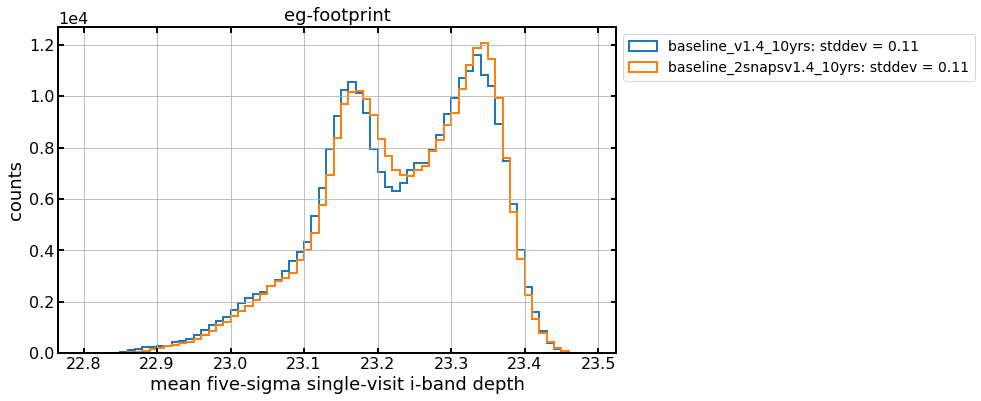

In [21]:
bins = np.arange(22.8, 23.5, 0.01)

plt.clf()

for dbname in depth_bundles:
    eg_pixels = np.where( depth_bundles[dbname].metricValues.mask == False )[0]
    
    stddev = np.std(five_sigma_depth_bundles[dbname].metricValues.data[eg_pixels])
    plt.hist( list(five_sigma_depth_bundles[dbname].metricValues.data[eg_pixels]), label='%s: stddev = %.2f' % (dbname, stddev), histtype='step', lw=2, bins=bins)

plt.xlabel('mean five-sigma single-visit i-band depth')
plt.ylabel('counts')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('eg-footprint')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

okay the single-visit depth distribution is basically the same between the two dbs

#### lets look at the nvisits for this band, then

In [22]:
 # consider only non-DD visits
sqlconstraint = ' note not like "DD%"'
sqlconstraint += ' and filter=="i"'

resultsDb = db.ResultsDb(outDir=outdir)

nvisits_all = {}
for dbname in dbnames:
    bundles = {}
    
    dbpath = '%s/%s.db' % (dbdir, dbname)

    opsdb = db.OpsimDatabase(dbpath)
    # set up slicer
    slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec',
                                   latLonDeg=opsdb.raDecInDeg, nside=nside, useCache=False)
    
    # set up the counts metric
    metric = metrics.CountMetric('observationStartMJD', metricName='Nvisits')
    
    bundles['nvisits'] = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # set up the group.
    grp = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outdir,
                                          resultsDb=resultsDb, saveEarly=False)
    grp.runAll()

    for key in bundles:
        nvisits_all[ dbname] = copy.deepcopy(bundles['nvisits'])

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 437227 visits
Running:  ['nvisits']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 403918 visits
Running:  ['nvisits']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [23]:
min_all, max_all = 1000, -1000
for dbname in nvisits_all:

    eg_pixels = eg_masks[dbname] == False
    
    min_all = min( [ min_all, min(nvisits_all[dbname].metricValues.data[eg_pixels]) ])
    max_all = max( [ max_all, max(nvisits_all[dbname].metricValues.data[eg_pixels]) ])
    
print(min_all, max_all)

92.0 237.0


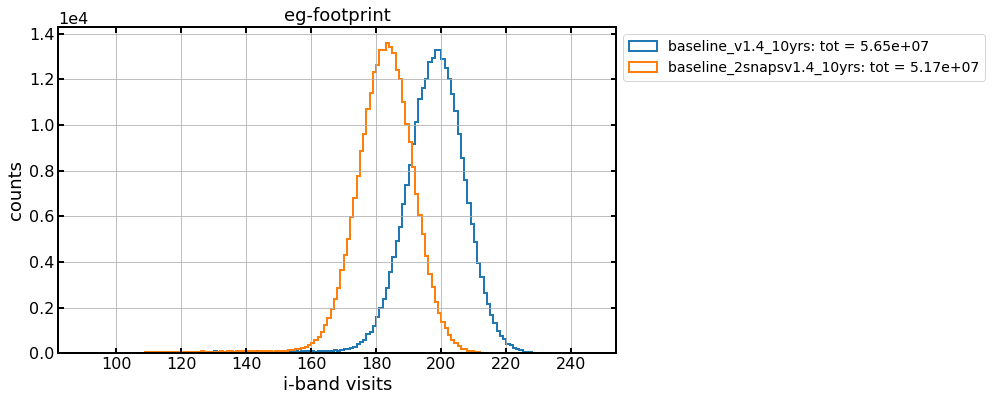

In [24]:
bins = np.arange(90., 247., 1.0)

plt.clf()

for dbname in nvisits_all:
    eg_pixels = eg_masks[dbname] == False
    
    total = np.sum(nvisits_all[dbname].metricValues.data[eg_pixels])
    plt.hist( list(nvisits_all[dbname].metricValues.data[eg_pixels]), label='%s: tot = %.2e' % (dbname, total), histtype='step', lw=2, bins=bins)

plt.xlabel('i-band visits')
plt.ylabel('counts')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('eg-footprint')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

##### okay we have more visits in the baseline than in 2snaps. the question now is whether the decrease in visits is the release for improved stddev with 2snaps

lets look at the nvisits skymaps

okay we really actually care about the fluctuations in the nvisits (since the stddev is of the depth across the survey)

In [25]:
data_to_compare = {}

for dbname in depth_bundles:
    
    in_survey = eg_masks[dbname] == False #np.where( depth_bundles[dbname].metricValues.mask == False )[0]
    
    mean_nvisits = np.mean(nvisits_all[dbname].metricValues.data[in_survey])
    
    rms_nvisits = np.sqrt(np.sum(nvisits_all[dbname].metricValues.data[in_survey]**2))
    
    std_nvisits = np.std(nvisits_all[dbname].metricValues.data[in_survey])
    
    total_nvisits = np.sum(nvisits_all[dbname].metricValues.data[in_survey])
    
    data_to_compare[dbname] = { 'mean_nvisits': mean_nvisits,
                               'rms_nvisits' : rms_nvisits,
                               'std_nvisits': std_nvisits,
                               'total_nvisits' : total_nvisits,
                               'stddev nvisits / total': float(std_nvisits) / total_nvisits
                               
                              }
    print('%s: mean nvisits: %.2f' % (dbname, mean_nvisits) )
    print('%s: std nvisits: %.2f' % (dbname, std_nvisits) )
    print('%s: rms nvisits: %.2f' % (dbname, rms_nvisits) )
    print('%s: stddev nvisits / total: %.2e' % (dbname, float(std_nvisits) / total_nvisits) )
    print('')

baseline_v1.4_10yrs: mean nvisits: 196.98
baseline_v1.4_10yrs: std nvisits: 11.24
baseline_v1.4_10yrs: rms nvisits: 105675.53
baseline_v1.4_10yrs: stddev nvisits / total: 1.99e-07

baseline_2snapsv1.4_10yrs: mean nvisits: 181.81
baseline_2snapsv1.4_10yrs: std nvisits: 10.13
baseline_2snapsv1.4_10yrs: rms nvisits: 97133.73
baseline_2snapsv1.4_10yrs: stddev nvisits / total: 1.96e-07



In [26]:
baseline_key = 'baseline_v1.4_10yrs'
dbname = 'baseline_2snapsv1.4_10yrs'

for key in data_to_compare[dbname]:
    print(key)
    print(data_to_compare[dbname][key], data_to_compare[baseline_key][key])
    print('diff compared to baseline: %.2f%%\n' % (100 * (data_to_compare[dbname][key] - data_to_compare[baseline_key][key])/data_to_compare[baseline_key][key]) )

mean_nvisits
181.8088405323437 196.9803432865997
diff compared to baseline: -7.70%

rms_nvisits
97133.72740196888 105675.52691612187
diff compared to baseline: -8.08%

std_nvisits
10.132924470663628 11.240404012381866
diff compared to baseline: -9.85%

total_nvisits
51734251.0 56508539.0
diff compared to baseline: -8.45%

stddev nvisits / total
1.958649110559971e-07 1.9891514116798997e-07
diff compared to baseline: -1.53%



hm does this make sense?

#### lets look at the depth stddev without any depth cut.

In [27]:
 # consider only non-DD visits
sqlconstraint = ' note not like "DD%"'
sqlconstraint += ' and filter=="i"'

resultsDb = db.ResultsDb(outDir=outdir)

dustmap = maps.DustMap(nside=nside, interp=False)

depth_nocut = {}
for dbname in dbnames:
    bundles = {}
    
    dbpath = '%s/%s.db' % (dbdir, dbname)

    opsdb = db.OpsimDatabase(dbpath)
    # set up slicer
    slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec',
                                   latLonDeg=opsdb.raDecInDeg, nside=nside, useCache=False)
    
    # set up the counts metric
    metric = metrics.ExgalM5(lsstFilter='i', ) #CountMetric('observationStartMJD', metricName='Nvisits')
    
    bundles['depth - no cut'] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, mapsList=[dustmap])
    
    # set up the group.
    grp = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outdir,
                                          resultsDb=resultsDb, saveEarly=False)
    grp.runAll()

    for key in bundles:
        depth_nocut[ dbname] = copy.deepcopy(bundles['depth - no cut'])

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_05/stack/current/Linux64/sims_photUtils/2.13.0.sims-1-g60d0775+26/python/lsst/sims/photUtils/Sed.py:917: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


Found 437227 visits
Running:  ['depth - no cut']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint  note not like "DD%" and filter=="i" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 403918 visits
Running:  ['depth - no cut']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


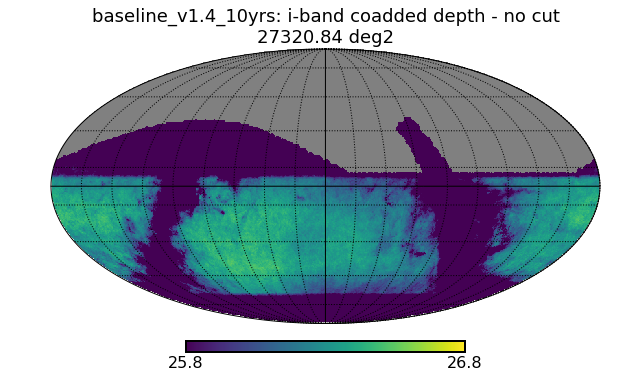

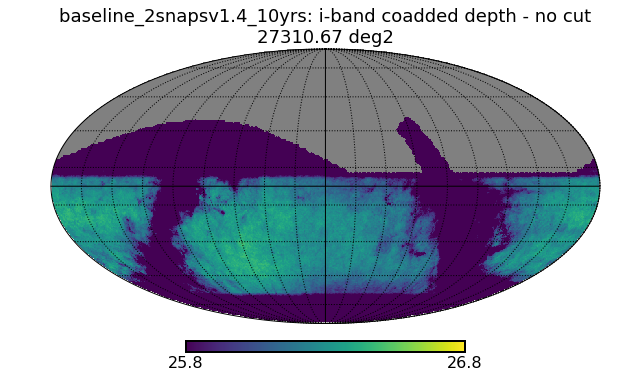

In [28]:
for dbname in depth_bundles:
    in_survey_pixels = np.where( depth_nocut[dbname].metricValues.mask == False )[0]
    hp.mollview(depth_nocut[dbname].metricValues, flip='astro', rot=(0,0,0),
                min=25.8, max=26.8, hold=True,
                cbar=True, title='%s: i-band coadded depth - no cut\n%.2f deg2' % (dbname , len(in_survey_pixels) * area_ppixel))
    hp.graticule(dpar=20, dmer=20, verbose=False)
    plt.show()

In [29]:
min_all, max_all = 1000, -1000
for dbname in depth_nocut:

    eg_pixels = eg_masks[dbname] == False
    
    min_all = min( [ min_all, min(depth_nocut[dbname].metricValues.data[eg_pixels]) ])
    max_all = max( [ max_all, max(depth_nocut[dbname].metricValues.data[eg_pixels]) ])
    
print(min_all, max_all)

25.90000669634359 26.571760537759893


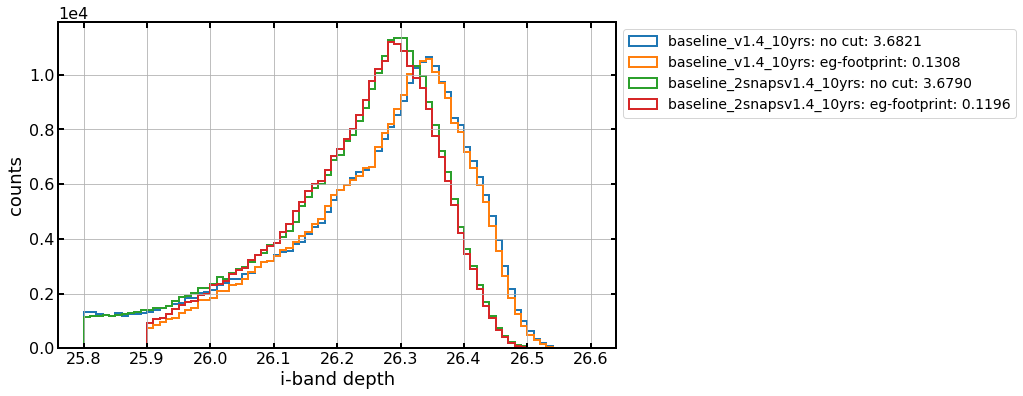

In [30]:
bins = np.arange(25.8, 26.6, 0.01)

plt.clf()

for dbname in depth_nocut:
    
    in_survey_pixels = np.where( depth_nocut[dbname].metricValues.mask == False )[0]
    stddev = np.std(depth_nocut[dbname].metricValues.data[in_survey_pixels])
    plt.hist( list(depth_nocut[dbname].metricValues.data[in_survey_pixels]), label='%s: no cut: %.4f' % (dbname, stddev), histtype='step', lw=2, bins=bins)
    
    eg_pixels = eg_masks[dbname] == False
    stddev = np.std(depth_bundles[dbname].metricValues.data[eg_pixels])
    plt.hist( list(depth_bundles[dbname].metricValues.data[eg_pixels]), label='%s: eg-footprint: %.4f' % (dbname, stddev), histtype='step', lw=2, bins=bins)
    
plt.xlabel('i-band depth')
plt.ylabel('counts')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.title('eg-footprint')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### lets find the pixels for EBV < 0.1, 0.2, without any depth cut.

In [31]:
ebv_maps = {}
eg_ebvonly_stricter = {}
eg_ebvonly = {}
for dbname in dbnames:
    bundles = {}
    
    dbpath = '%s/%s.db' % (dbdir, dbname)
    
    opsdb = db.OpsimDatabase(dbpath)
    simdata = opsdb.fetchMetricData(['fieldId', 'fieldRA', 'fieldDec'],  # assume v4 outputs: fieldID in v3
                                    sqlconstraint=None)
    slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec',
                                   latLonDeg=opsdb.raDecInDeg, nside=nside)
    slicer.setupSlicer(simdata)

    dustmap = maps.DustMap(nside=nside)
    result = dustmap.run(slicer.slicePoints)
    
    ebv_maps[dbname] = result['ebv'].copy()
    eg_ebvonly[dbname] = result['ebv'] < 0.2
    eg_ebvonly_stricter[dbname] = result['ebv'] < 0.1

ebvs_all = {'ebv < 0.2': eg_ebvonly, 'ebv < 0.1': eg_ebvonly_stricter}

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


<Figure size 720x432 with 0 Axes>

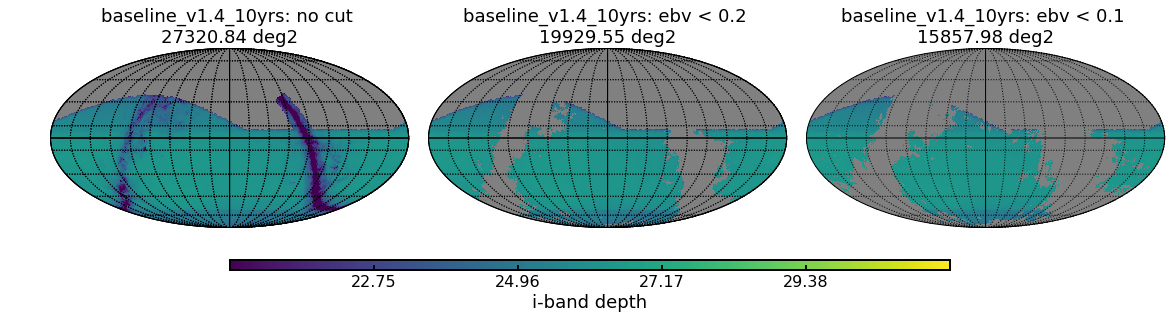

<Figure size 720x432 with 0 Axes>

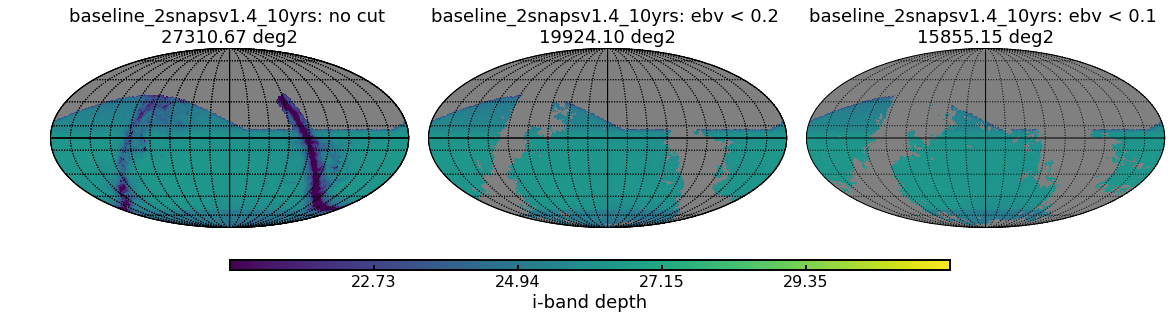

In [32]:
for dbname in depth_bundles:

    plt.clf()
    fig, axes = plt.subplots(1,3)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    in_survey_pixels = np.where( depth_nocut[dbname].metricValues.mask == False )[0]
    # find the color range
    median = np.median(depth_nocut[dbname].metricValues.data[in_survey_pixels])
    stddev = np.std(depth_nocut[dbname].metricValues.data[in_survey_pixels])

    colormin = median - 1.5 * stddev
    colormax = median + 1.5 * stddev
    nticks = 5
    
    # no cut
    
    title = '%s: no cut \n%.2f deg2' % (dbname , len(in_survey_pixels) * area_ppixel)
    plt.axes(axes[0])
    hp.mollview(depth_nocut[dbname].metricValues, flip='astro', rot=(0,0,0),
                min=colormin, max=colormax, hold=True,
                cbar=False, title=title)
    hp.graticule(dpar=20, dmer=20, verbose=False)
    
    for i, ebv_key in enumerate(ebvs_all):
        
        in_survey_pixels = np.where( (depth_nocut[dbname].metricValues.mask == False) &  (ebvs_all[ebv_key][dbname] == True)  )[0] 
        title = '%s: %s \n%.2f deg2' % (dbname , ebv_key, len(in_survey_pixels) * area_ppixel)
    
        temp = copy.deepcopy( depth_nocut[dbname] )
        temp.metricValues.mask[:] = True
        temp.metricValues.mask[in_survey_pixels] = False
        
        plt.axes(axes[i+1])
        hp.mollview(temp.metricValues, flip='astro', rot=(0,0,0),
                    min=colormin, max=colormax, hold=True,
                    cbar=False, title=title)
        hp.graticule(dpar=20, dmer=20, verbose=False)
    
    
    # set up the color bar
    increment = (colormax - colormin) / float(nticks)
    ticks = np.arange(colormin + increment, colormax, increment)

    ax = plt.gca()
    im = ax.get_images()[0]
    fig = plt.gcf()
    cbaxes = fig.add_axes([0.25, 0.38, 0.5, 0.01]) # [left, bottom, width, height]
    cb = plt.colorbar(im, orientation='horizontal',
                      ticks=ticks, format='%.2f', cax=cbaxes
                     )
    cb.set_label( 'i-band depth' )
    
    fig.set_size_inches(20, 15)
    plt.show()

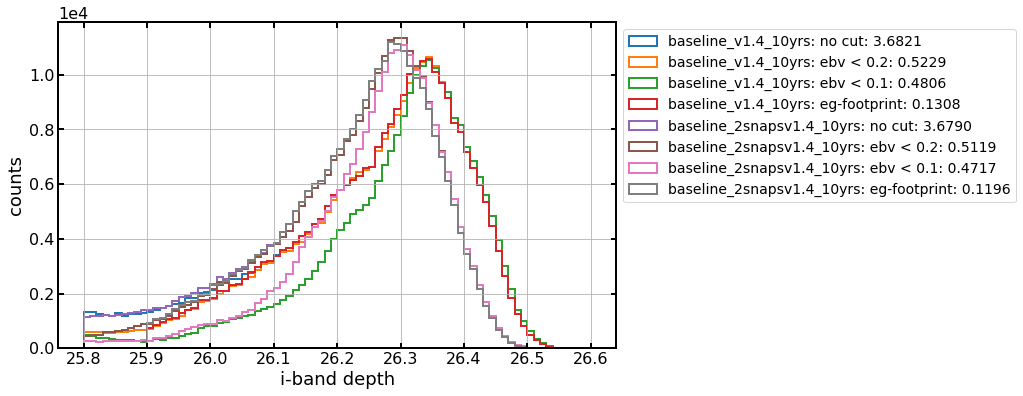

In [33]:
bins = np.arange(25.8, 26.6, 0.01)

plt.clf()

stddevs = {}
in_survey_all = {}
for dbname in depth_nocut:
    stddevs[dbname] = {}
    in_survey_all[dbname] = {}
    in_survey_pixels = np.where( depth_nocut[dbname].metricValues.mask == False )[0]
    stddev = np.std(depth_nocut[dbname].metricValues.data[in_survey_pixels])
    plt.hist( list(depth_nocut[dbname].metricValues.data[in_survey_pixels]), label='%s: no cut: %.4f' % (dbname, stddev), histtype='step', lw=2, bins=bins)
    
    stddevs[dbname]['no cut'] = stddev
    in_survey_all[dbname]['no cut'] = in_survey_pixels.copy()
    
    for ebv_key in ebvs_all:
        in_survey_pixels = np.where( (depth_nocut[dbname].metricValues.mask == False) &  (ebvs_all[ebv_key][dbname] == True)  )[0] 
        stddev = np.std(depth_nocut[dbname].metricValues.data[in_survey_pixels])
        plt.hist( list(depth_nocut[dbname].metricValues.data[in_survey_pixels]), label='%s: %s: %.4f' % (dbname,  ebv_key, stddev), histtype='step', lw=2, bins=bins)
    
        stddevs[dbname][ebv_key] = stddev
        in_survey_all[dbname][ebv_key] = in_survey_pixels.copy()
        
    eg_pixels = eg_masks[dbname] == False
    stddev = np.std(depth_bundles[dbname].metricValues.data[eg_pixels])
    plt.hist( list(depth_bundles[dbname].metricValues.data[eg_pixels]), label='%s: eg-footprint: %.4f' % (dbname, stddev), histtype='step', lw=2, bins=bins)
    
    stddevs[dbname]['eg-footprint'] = stddev
    in_survey_all[dbname]['eg-footprint'] = eg_pixels.copy()
    
plt.xlabel('i-band depth')
plt.ylabel('counts')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.title('eg-footprint')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

##### calculate stddev differences

In [34]:
baseline_key = 'baseline_v1.4_10yrs'
dbname = 'baseline_2snapsv1.4_10yrs'

for key in stddevs[dbname]:
    print(key)
    #print(stddevs[dbname][key], stddevs[baseline_key][key])
    print('stddev diff compared to baseline: %.2f%%\n' % (100 * (stddevs[dbname][key] - stddevs[baseline_key][key])/stddevs[baseline_key][key]) )

no cut
stddev diff compared to baseline: -0.08%

ebv < 0.2
stddev diff compared to baseline: -2.10%

ebv < 0.1
stddev diff compared to baseline: -1.85%

eg-footprint
stddev diff compared to baseline: -8.56%



In [35]:
data_to_compare_all = {}

for dbname in depth_bundles:
    data_to_compare_all[dbname] = {}
    for key in in_survey_all[dbname]:

        in_survey = in_survey_all[dbname][key]

        mean_nvisits = np.mean(nvisits_all[dbname].metricValues.data[in_survey])

        rms_nvisits = np.sqrt(np.sum(nvisits_all[dbname].metricValues.data[in_survey]**2))

        std_nvisits = np.std(nvisits_all[dbname].metricValues.data[in_survey])

        total_nvisits = np.sum(nvisits_all[dbname].metricValues.data[in_survey])

        data_to_compare_all[dbname][key] = { 'mean_nvisits': mean_nvisits,
                                   'rms_nvisits' : rms_nvisits,
                                   'std_nvisits': std_nvisits,
                                   'total_nvisits' : total_nvisits,
                                   'stddev nvisits / total': float(std_nvisits) / total_nvisits
                                  }

In [36]:
baseline_key = 'baseline_v1.4_10yrs'
dbname = 'baseline_2snapsv1.4_10yrs'

for cut_key in data_to_compare_all[dbname]:
    print(cut_key)
    for stat_key in data_to_compare_all[dbname]['no cut']:

        #print(stddevs[dbname][key], stddevs[baseline_key][key])
        print('%s diff compared to baseline: %.2f%%' % (stat_key, 100 * (data_to_compare_all[dbname][cut_key][stat_key] - \
                                                              data_to_compare_all[baseline_key][cut_key][stat_key]) / \
                                                               data_to_compare_all[baseline_key][cut_key][stat_key]) 
             )
    print('')

no cut
mean_nvisits diff compared to baseline: -7.58%
rms_nvisits diff compared to baseline: -7.75%
std_nvisits diff compared to baseline: -8.55%
total_nvisits diff compared to baseline: -7.61%
stddev nvisits / total diff compared to baseline: -1.01%

ebv < 0.2
mean_nvisits diff compared to baseline: -7.69%
rms_nvisits diff compared to baseline: -7.77%
std_nvisits diff compared to baseline: -8.25%
total_nvisits diff compared to baseline: -7.72%
stddev nvisits / total diff compared to baseline: -0.58%

ebv < 0.1
mean_nvisits diff compared to baseline: -7.74%
rms_nvisits diff compared to baseline: -7.78%
std_nvisits diff compared to baseline: -8.16%
total_nvisits diff compared to baseline: -7.75%
stddev nvisits / total diff compared to baseline: -0.44%

eg-footprint
mean_nvisits diff compared to baseline: -7.70%
rms_nvisits diff compared to baseline: -8.08%
std_nvisits diff compared to baseline: -9.85%
total_nvisits diff compared to baseline: -8.45%
stddev nvisits / total diff compared t